<a href="https://colab.research.google.com/github/soheldatta17/Expensive-Football-Player-Analysis/blob/main/Expensive_Football_Player_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expensive Football Player Analysis by Sohel Datta**

In [2]:
import kagglehub
import os
import shutil

content_folder = 'content'
os.makedirs(content_folder, exist_ok=True)

jeongbinpark_staatfont_path = kagglehub.dataset_download('jeongbinpark/staatfont')
berkayalan_the_most_expensive_football_transfers_path = kagglehub.dataset_download('berkayalan/the-most-expensive-football-transfers')

staatfont_dest = os.path.join(content_folder, os.path.basename(jeongbinpark_staatfont_path))
football_transfers_dest = os.path.join(content_folder, os.path.basename(berkayalan_the_most_expensive_football_transfers_path))

shutil.move(jeongbinpark_staatfont_path, staatfont_dest)
shutil.move(berkayalan_the_most_expensive_football_transfers_path, football_transfers_dest)

print('Data source import complete. Files saved in the "content" folder.')

Data source import complete. Files saved in the "content" folder.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
font = fm.FontProperties(fname='/content/content/1/Staatliches-Regular.ttf')
data = pd.read_csv("/content/content/1/1/football_players.csv")

In [41]:
data.head(10)

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
5,6,England,Jack Grealish,England,Aston Villa,England,Manchester City,Midfielder,117.0,£100,2021,1995
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
7,7,France,Ousmane Dembélé,Germany,Borussia Dortmund,Spain,Barcelona,Forward,105.0,£97,2017,1997
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
9,10,Portugal,Cristiano Ronaldo,Spain,Real Madrid,Italy,Juventus,Forward,100.0,£88,2018,1985



* Rank: Rank of transfer

* Origin : Origin Country of Player

* Player : Player Name

* From(Country) : From which country the player transferred?

* From(Club) : From which Club the player transferred?

* To(Country) : To which country the player transferred?

* To(Club) : To which Club the player transferred?

* Position : Position of The player

* Fee(€ mln) : How much fee were paid for the transfer as € mln.

* Fee(£ mln) : How much fee were paid for the transfer as £ mln.

* Year : In which year the transfer occured?

* Born : When was the player born?

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
1. The average of player trade price each position
</h1>
</div>

### Football generally has 4 different positions
* Forward

* Midfielder

* Defender

* Goalkeeper

<ipython-input-43-b2fe5b04a7a2>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(s = f"{position.index[i]} ({each_position_count[i*-1 +3]})", x=round(position['Fee_€ mln'][i]-1,2), y=i ,font = font, fontsize=30,va='center',ha='right')
<ipython-input-43-b2fe5b04a7a2>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(s = f"{round(position['Fee_€ mln'][i],2)} € mln", x=round(position['Fee_€ mln'][i]+1,2), y=i ,font = font, fontsize=30,va='center',ha='left')


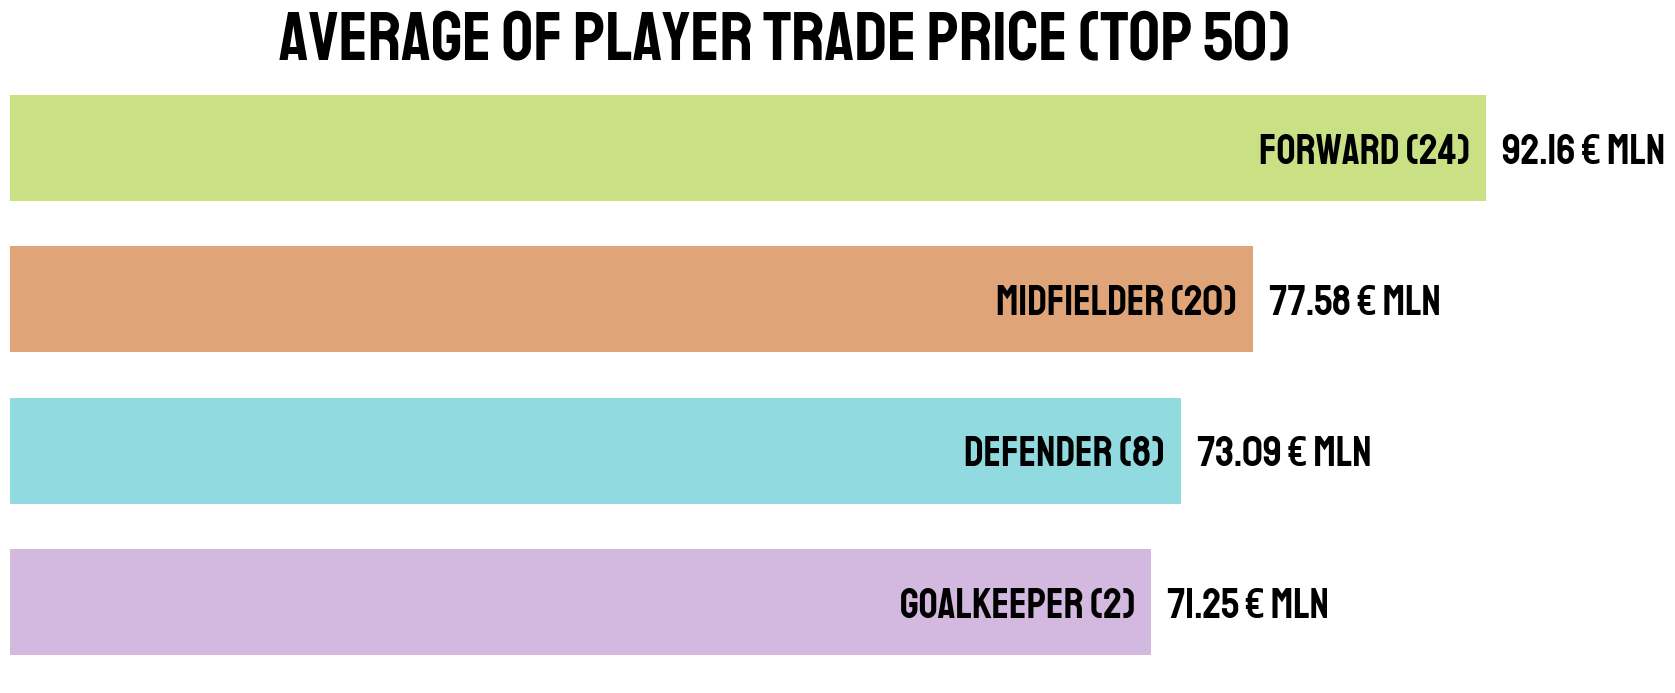

In [43]:
data.columns = ['Rank', 'Origin', 'Player', 'From_Country', 'From_Club',
       'To_Country', 'To_Club', 'Position', 'Fee_€ mln','Fee_£ mln','Year', 'Born']

data['Position'] = data['Position'].apply(lambda x : x if x!='Striker' else 'Forward')
position = pd.DataFrame(data.groupby('Position')['Fee_€ mln'].mean())
position = position.sort_values('Fee_€ mln', axis=0,ascending=True)
each_position_count = data['Position'].value_counts()

fig = plt.figure(figsize=(20,8))
plt.barh(width=position['Fee_€ mln'], y=position.index,height=0.7, color = ['#D3B9DF','#90DAE0','#E0A479','#CAE084'])
for i in range(len(position)):
    plt.text(s = f"{position.index[i]} ({each_position_count[i*-1 +3]})", x=round(position['Fee_€ mln'][i]-1,2), y=i ,font = font, fontsize=30,va='center',ha='right')
    plt.text(s = f"{round(position['Fee_€ mln'][i],2)} € mln", x=round(position['Fee_€ mln'][i]+1,2), y=i ,font = font, fontsize=30,va='center',ha='left')

plt.title("average of player trade price (Top 50)",font=font, fontsize=50)
plt.axis('off')
plt.show()

In [44]:
data.columns.tolist()

['Rank',
 'Origin',
 'Player',
 'From_Country',
 'From_Club',
 'To_Country',
 'To_Club',
 'Position',
 'Fee_€ mln',
 'Fee_£ mln',
 'Year',
 'Born']

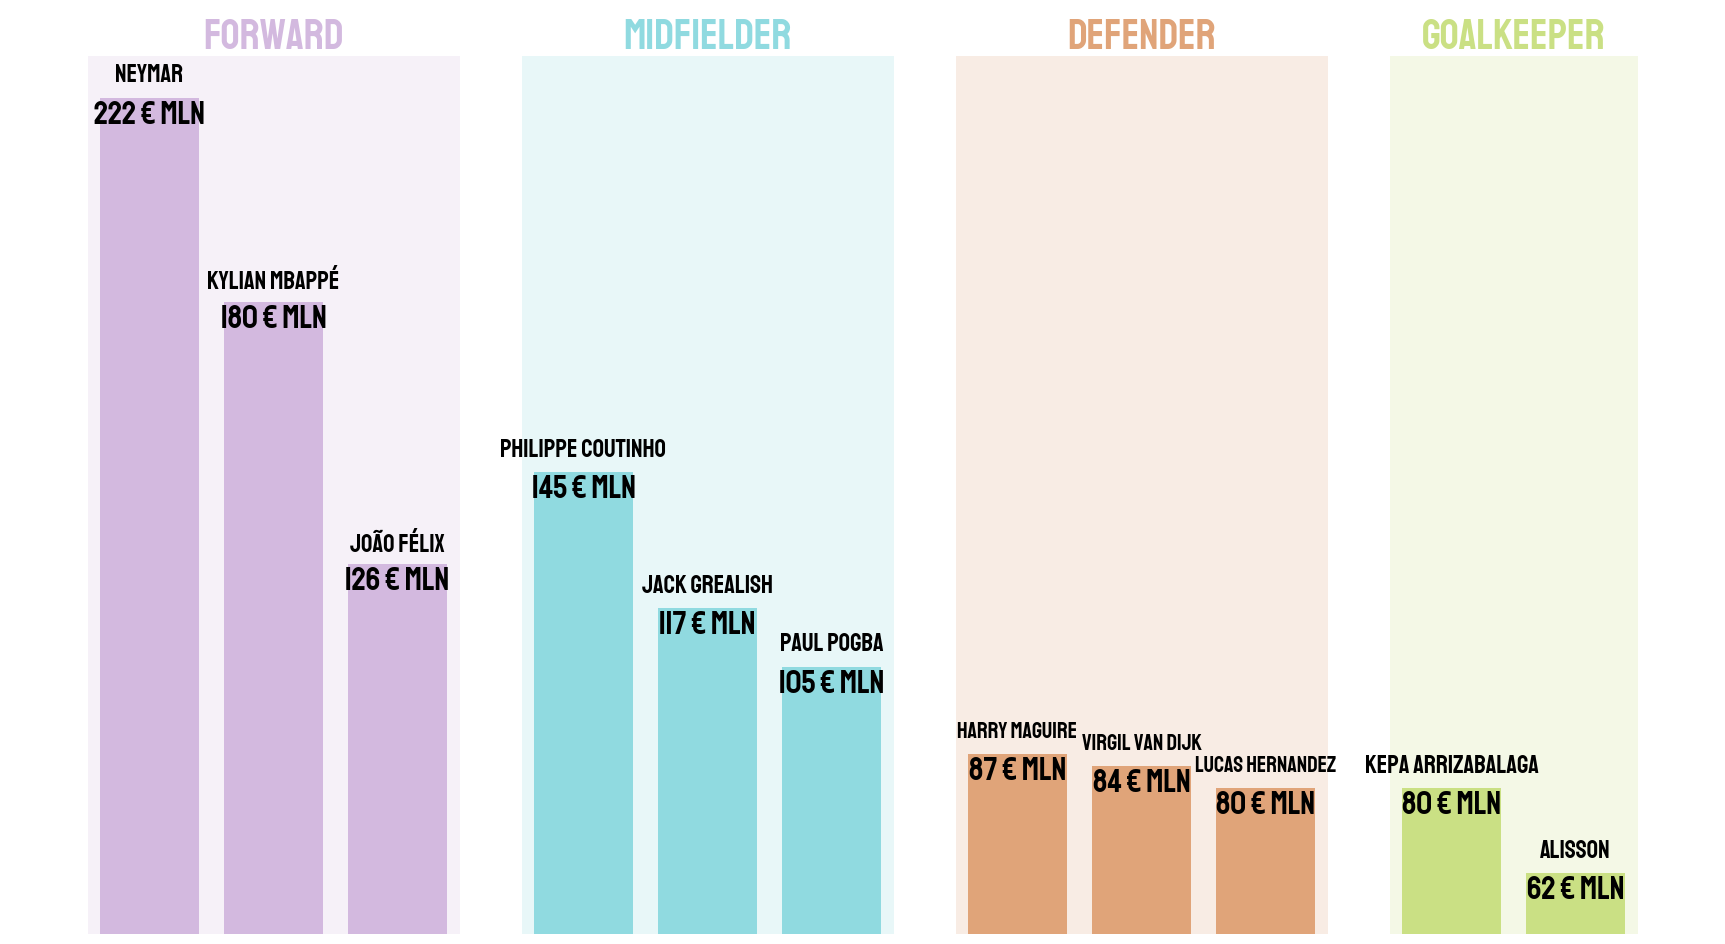

In [45]:
forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22,12), facecolor="w")
plt.bar(x= [0,1,2], height=forward['Fee_€ mln'], color ='#D3B9DF')
plt.bar(x= [3.5,4.5,5.5], height=mid['Fee_€ mln'], color='#90DAE0')
plt.bar(x= [7,8,9], height=defend['Fee_€ mln'], color ='#E0A479')
plt.bar(x= [10.5,11.5], height=goalkeeper['Fee_€ mln'], color ='#CAE084')

ax.axvspan(xmin = -0.5,xmax= 2.5, ymax= 0.95, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 3,xmax= 6, ymax= 0.95, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 6.5,xmax= 9.5, ymax= 0.95, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin = 10,xmax= 12, ymax= 0.95, fc='#CAE084', alpha=0.2)

for i in range(len(forward)):
    plt.text(s = forward.loc[i,'Player'], x= i, y= forward.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(forward.loc[i,'Fee_€ mln'])} € mln", x= i, y= forward.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

    plt.text(s = mid.loc[i,'Player'], x= i+3.5, y= mid.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(mid.loc[i,'Fee_€ mln'])} € mln", x= i+3.5, y= mid.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

    plt.text(s = defend.loc[i,'Player'], x= i+7, y= defend.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 16)
    plt.text(s = f"{round(defend.loc[i,'Fee_€ mln'])} € mln", x= i+7, y= defend.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

    if i ==2:
        break
    plt.text(s = goalkeeper.loc[i,'Player'], x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(goalkeeper.loc[i,'Fee_€ mln'])} € mln", x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

plt.text(s = "forward", x= 1, y= 235, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "Midfielder", x= 4.5, y= 235, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "Defender", x= 8, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')
plt.text(s = "Goalkeeper", x= 11, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#CAE084')

plt.ylim(50,240)
plt.axis('off')
plt.show()

In [15]:
!pip install Pillow
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00


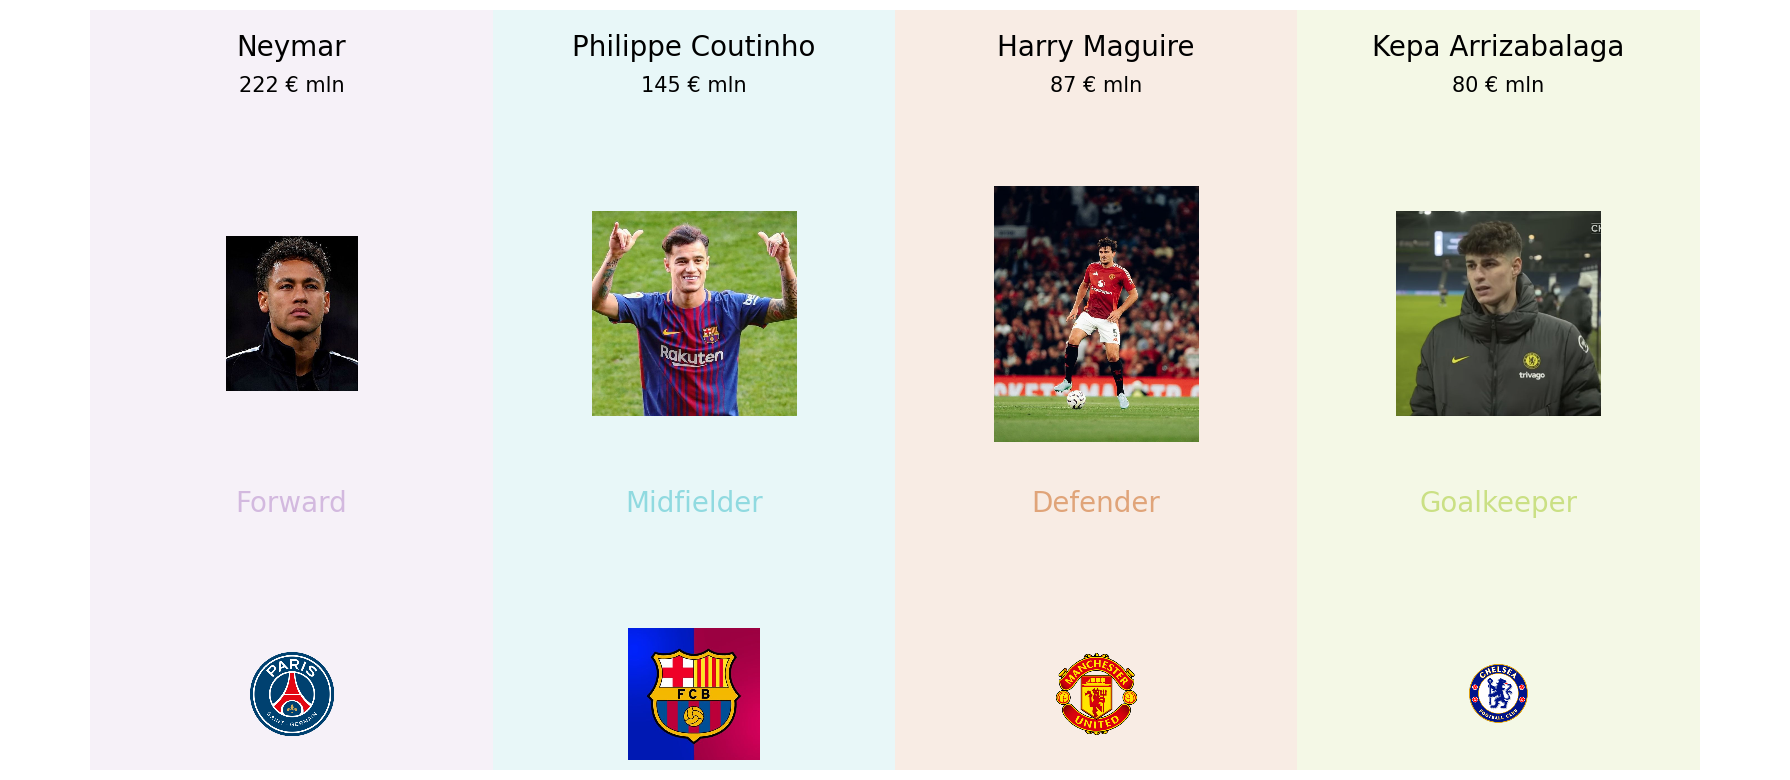

In [47]:
from PIL import Image
import requests
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cairosvg

def make_img(img, zoom, x, y):
    """
    Displays an image on the plot.

    Args:
        img (str): URL of the image.
        zoom (float): Zoom factor for the image.
        x (float): X coordinate for the image placement.
        y (float): Y coordinate for the image placement.
    """
    try:
        # If the image is an SVG, convert it to PNG using cairosvg
        if img.lower().endswith('.svg'):
            png_data = cairosvg.svg2png(url=img)
            img = Image.open(io.BytesIO(png_data))
        else:
            # Use requests to get the image data from the URL for other formats
            response = requests.get(img)
            response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
            img = Image.open(io.BytesIO(response.content))

        # Convert the Pillow image to a NumPy array that matplotlib can understand
        img = mpimg.pil_to_array(img)

        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)

    except Exception as e:
        print(f"Error processing image {img}: {e}")

forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(18, 8), facecolor="w")  # Reduced figure size

# Adjust background spans
ax.axvspan(xmin=0, xmax=4, ymax=1, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin=4, xmax=8, ymax=1, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin=8, xmax=12, ymax=1, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin=12, xmax=16, ymax=1, fc='#CAE084', alpha=0.2)

# Adjust zoom and positions
make_img('https://i.pinimg.com/736x/65/c6/e3/65c6e35f43f04c834fb5f135e2ef96cc.jpg', 0.2, 2, 0.6)
make_img('https://upload.wikimedia.org/wikipedia/en/a/a7/Paris_Saint-Germain_F.C..svg', 0.2, 2, 0.1)
make_img('https://i.pinimg.com/736x/4c/90/b6/4c90b63476ae9bab180e6826dcac722c.jpg', 0.2, 6, 0.6)
make_img('https://i.pinimg.com/474x/0d/c4/c8/0dc4c86d8590170d02719a27c615da9f.jpg', 0.2, 6, 0.1)
make_img('https://i.pinimg.com/736x/a4/be/68/a4be686f2547615f74c67257773cd22b.jpg', 0.2, 10, 0.6)
make_img('https://upload.wikimedia.org/wikipedia/en/7/7a/Manchester_United_FC_crest.svg', 0.2, 10, 0.1)
make_img('https://i.pinimg.com/736x/a0/58/ec/a058ece5cf6a440ab0a01c0030ed211f.jpg', 0.2, 14, 0.6)
make_img('https://upload.wikimedia.org/wikipedia/en/c/cc/Chelsea_FC.svg', 0.2, 14, 0.1)

# Text adjustments with smaller font sizes
plt.text(s=forward.loc[0, 'Player'], x=2, y=0.95, va='center', ha='center', fontsize=20)
plt.text(s=mid.loc[0, 'Player'], x=6, y=0.95, va='center', ha='center', fontsize=20)
plt.text(s=defend.loc[0, 'Player'], x=10, y=0.95, va='center', ha='center', fontsize=20)
plt.text(s=goalkeeper.loc[0, 'Player'], x=14, y=0.95, va='center', ha='center', fontsize=20)

plt.text(s=f"{round(forward.loc[0, 'Fee_€ mln'])} € mln", x=2, y=0.9, va='center', ha='center', fontsize=15)
plt.text(s=f"{round(mid.loc[0, 'Fee_€ mln'])} € mln", x=6, y=0.9, va='center', ha='center', fontsize=15)
plt.text(s=f"{round(defend.loc[0, 'Fee_€ mln'])} € mln", x=10, y=0.9, va='center', ha='center', fontsize=15)
plt.text(s=f"{round(goalkeeper.loc[0, 'Fee_€ mln'])} € mln", x=14, y=0.9, va='center', ha='center', fontsize=15)

plt.text(s="Forward", x=2, y=0.35, va='center', ha='center', fontsize=20, color='#D3B9DF')
plt.text(s="Midfielder", x=6, y=0.35, va='center', ha='center', fontsize=20, color='#90DAE0')
plt.text(s="Defender", x=10, y=0.35, va='center', ha='center', fontsize=20, color='#E0A479')
plt.text(s="Goalkeeper", x=14, y=0.35, va='center', ha='center', fontsize=20, color='#CAE084')

plt.axis('off')
plt.tight_layout()
plt.show()


### This is each position's most expensive players, you can feel forward and midfileder position are more expensive than defender and goalkeeper

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
2. Which club  trades most of the players?
</h1>
</div>

In [49]:
data.columns.tolist()

['Rank',
 'Origin',
 'Player',
 'From_Country',
 'From_Club',
 'To_Country',
 'To_Club',
 'Position',
 'Fee_€ mln',
 'Fee_£ mln',
 'Year',
 'Born']

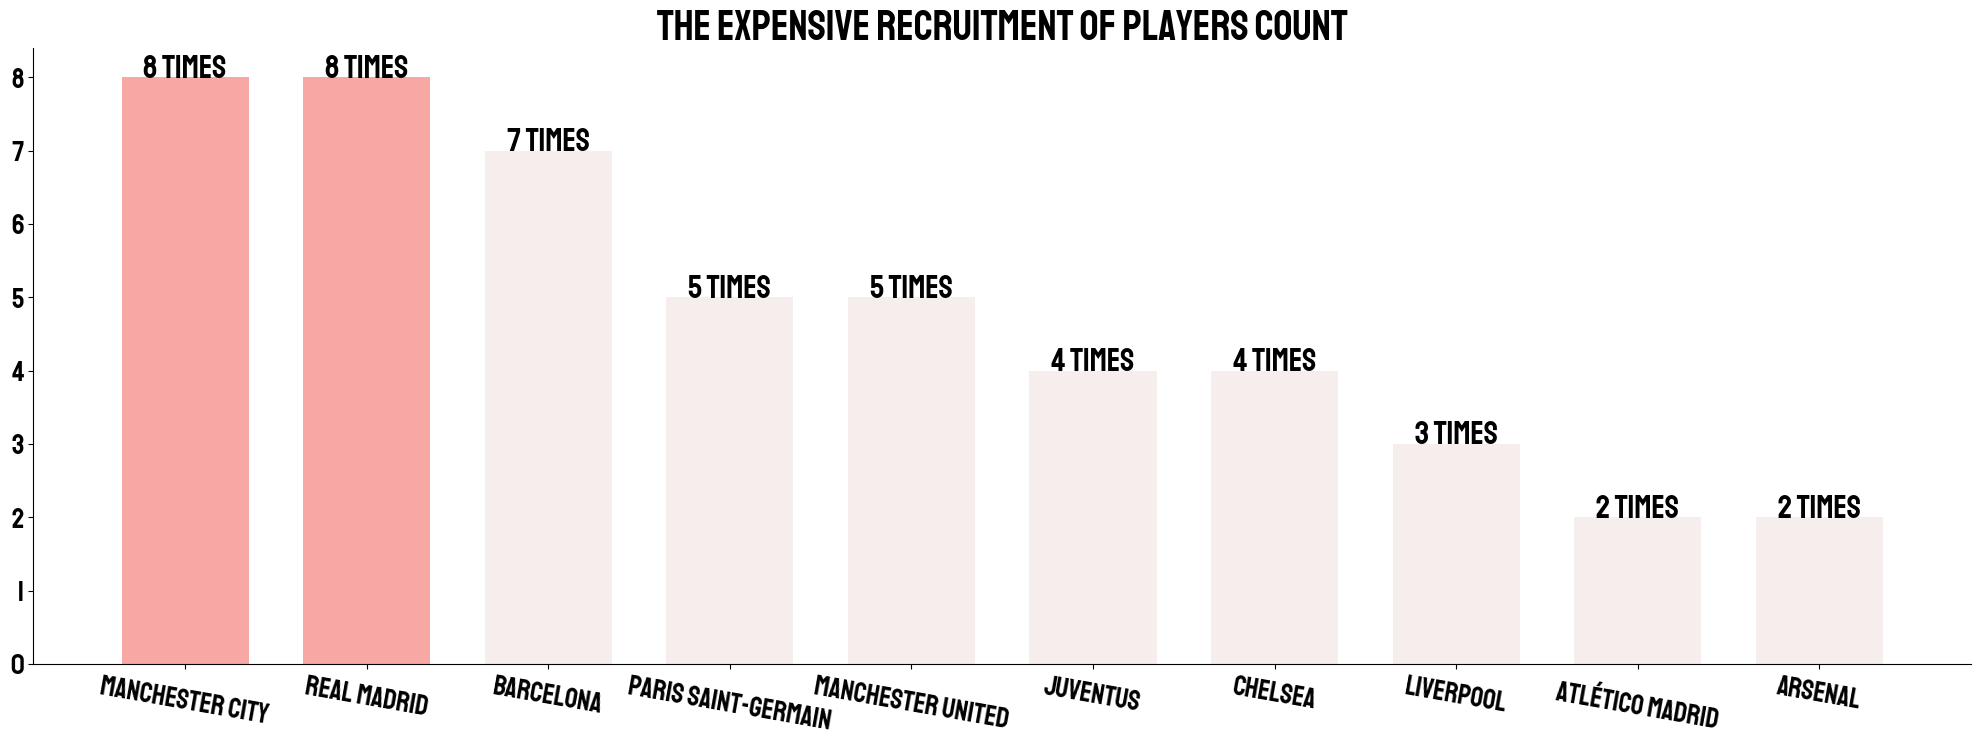

In [51]:
many_club_all = data['To_Club'].value_counts()
many_club = pd.DataFrame(many_club_all[:10]).reset_index()
many_club.columns = ['team', 'count']

color = ['#F7A8A5', '#F7A8A5']
color += ['#F5EEED']*8
plt.figure(figsize=(25,8))
plt.bar(x=many_club['team'], height = many_club['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club)):
    plt.text(s= f"{many_club.loc[i,'count']} times", x= i, y=many_club.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive Recruitment of players count", font=font, fontsize=30)
plt.show()

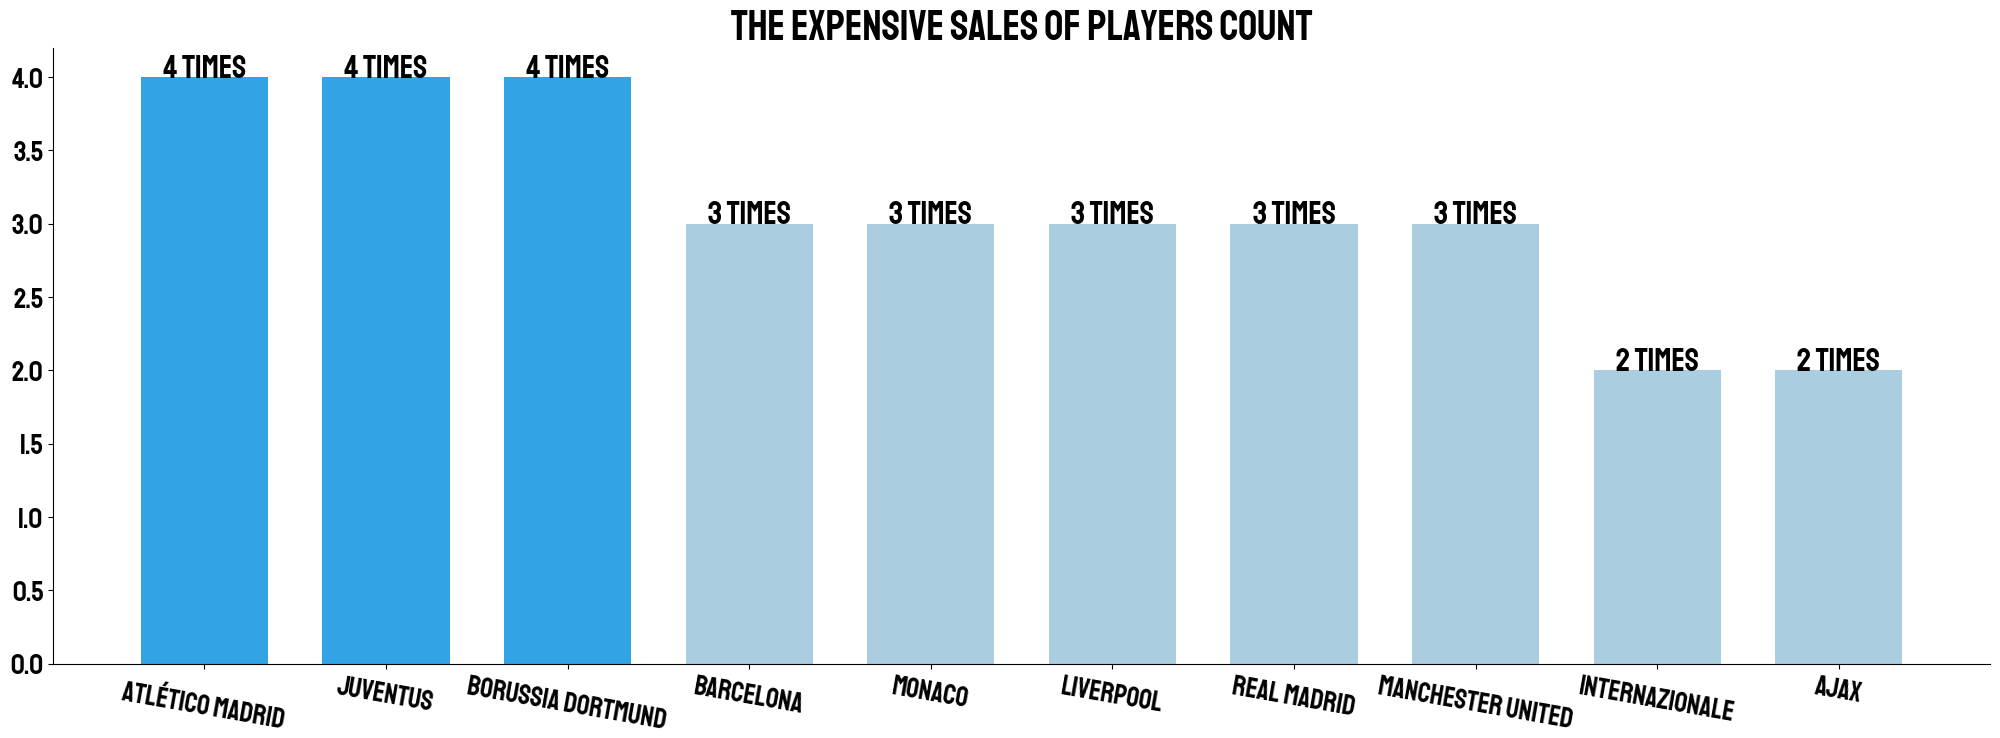

In [52]:
many_club_sale_all = data['From_Club'].value_counts()
many_club_sale = pd.DataFrame(many_club_sale_all[:10]).reset_index()
many_club_sale.columns = ['team', 'count']

color = ['#32A4E6']*3
color += ['#ABCDE0']*7
plt.figure(figsize=(25,8))
plt.bar(x=many_club_sale['team'], height = many_club_sale['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club_sale)):
    plt.text(s= f"{many_club_sale.loc[i,'count']} times", x= i, y=many_club_sale.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive sales of players count", font=font, fontsize=30)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
3. Where is that expensive player's country?
</h1>
</div>

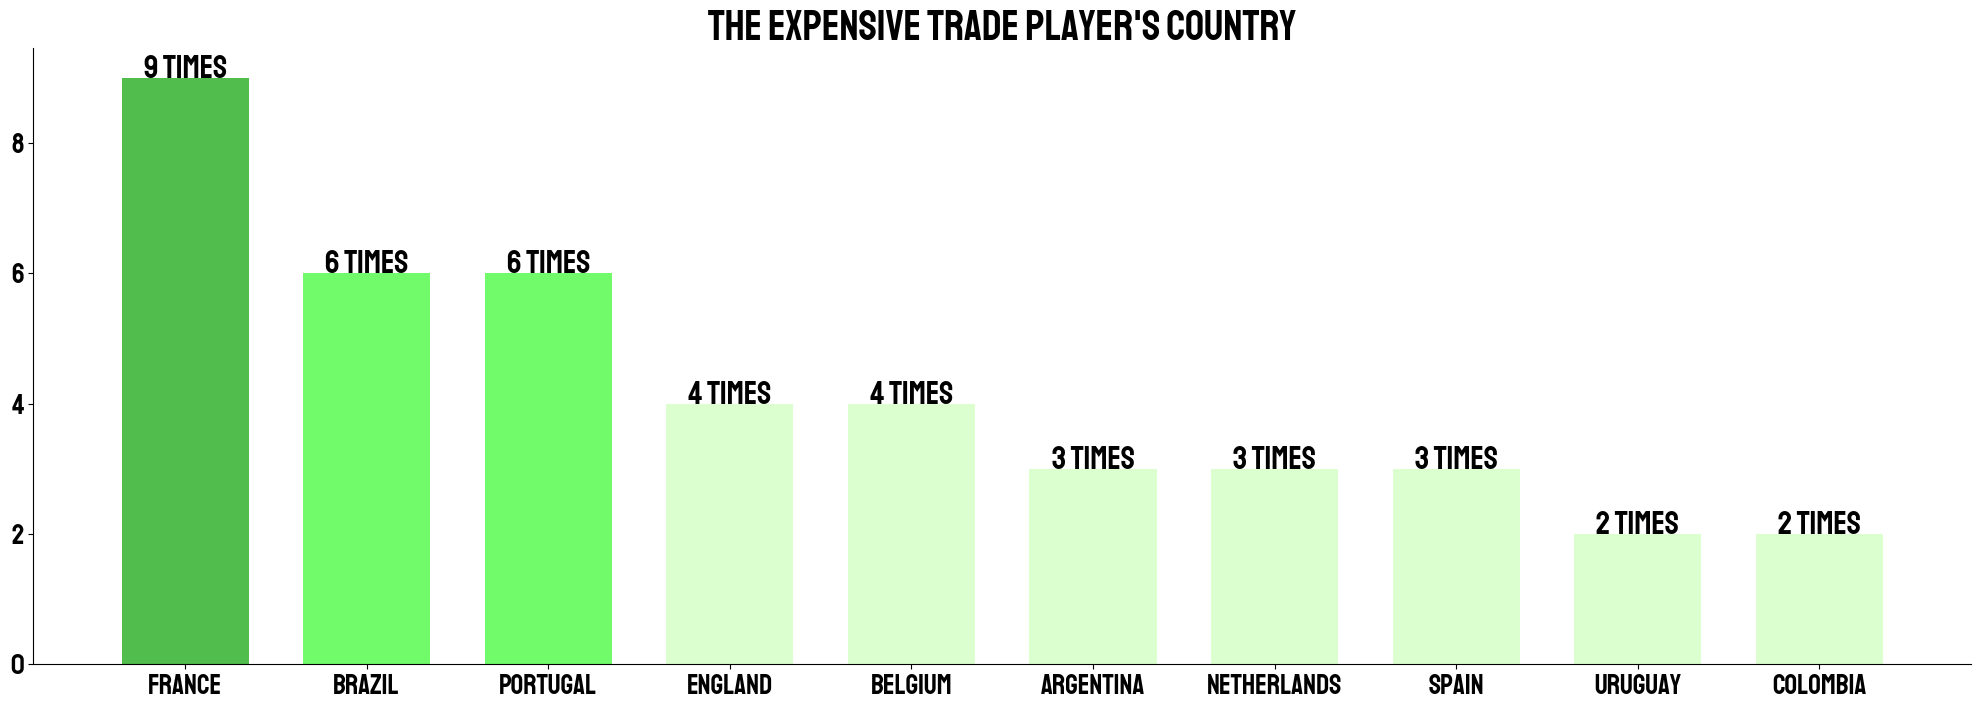

In [55]:
country = data['Origin'].value_counts()
country = pd.DataFrame(country[country > 1]).reset_index()
country.columns= ['country','count']
color = ['#26AD1F', '#4EFA46','#4EFA46']
color += ['#D4FFC5']*7
plt.figure(figsize=(25,8))
plt.bar(x=country['country'], height = country['count'],width=0.7,color =color,alpha=0.8)
plt.xticks(font=font,fontsize=20)
plt.yticks(font=font,fontsize=20)

for i in range(len(country)):
    plt.text(s= f"{country.loc[i,'count']} times", x= i, y=country.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive trade player's country", font=font, fontsize=30)
plt.show()

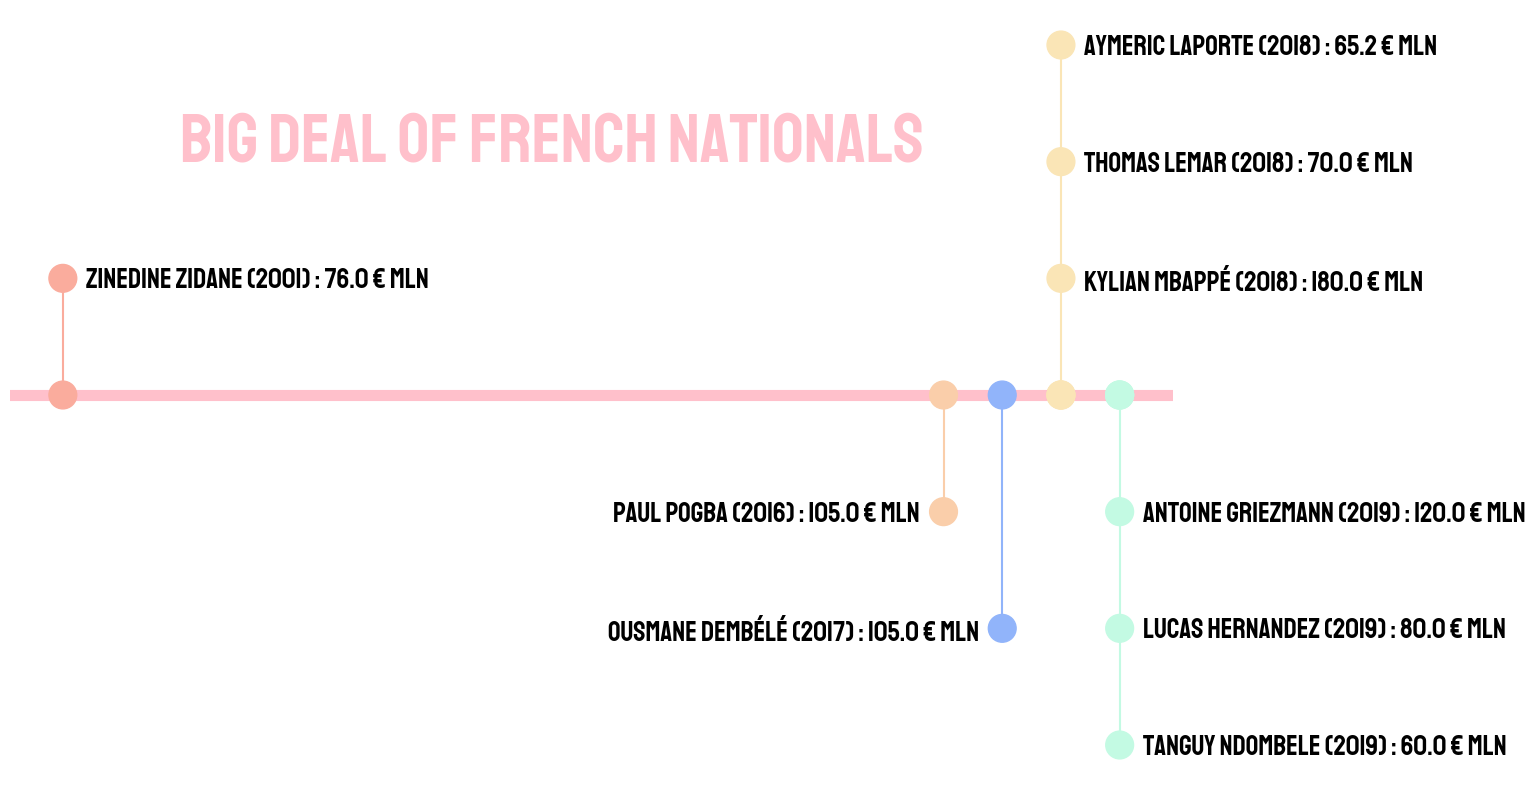

In [56]:
france = data[data['Origin'] =='France'].reset_index(drop=True)
fig = plt.figure(figsize=(15,10))
color = ['#FAE5B6','#C3FAE3','#FACEAA','#91B4FA','#C3FAE3','#FAAC9D','#FAE5B6','#FAE5B6','#C3FAE3']
plt.axhline(0,color='pink',lw=8,zorder=1)
plt.scatter(x=france['Year'], y=list([0]* 9),s=400,zorder=2,color = color)
plt.plot([2001,2001],[0,1],color = '#FAAC9D')
plt.plot([2016,2016],[0,-1],color = '#FACEAA')
plt.plot([2017,2017],[0,-2],color = '#91B4FA')
plt.plot([2018,2018],[0,3],color = '#FAE5B6')
plt.plot([2019,2019],[0,-3],color = '#C3FAE3')
color = ['#FAAC9D', '#FACEAA','#91B4FA','#FAE5B6','#FAE5B6','#FAE5B6','#C3FAE3','#C3FAE3','#C3FAE3']
plt.scatter([2001,2016,2017,2018,2018,2018,2019,2019,2019],[1,-1,-2,1,2,3,-1,-2,-3],s=400,color = color)
i = [5,2,3,0,6,7,1,4,8]
y = [1,-1,-2,1,2,3,-1,-2,-3]
position = ['left','right','right','left','left','left','left','left','left']
for j in range(9):
    if position[j] > 'left':
        x = france.loc[i[j],'Year'] -0.4
    else:
        x = france.loc[i[j],'Year'] +0.4
    plt.text(s=f"{france.loc[i[j],'Player']} ({france.loc[i[j],'Year']}) : {france.loc[i[j],'Fee_€ mln']} € mln" , x=x, y=y[j],font=font, fontsize=20,va='center',ha=position[j])
plt.text(s="Big Deal of French Nationals", x=2003, y=2, font=font, fontsize=50,color='pink')

plt.axis('off')
fig.show()